In [1]:
pip install tensorflow scikit-learn matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: C:\Users\ameya\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (404, 13)
Testing data shape: (102, 13)


In [5]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # 1 neuron for regression output
    ])
    model.compile(
        optimizer='adam',
        loss='mse',   # Mean Squared Error loss
        metrics=['mae']  # Mean Absolute Error metric
    )
    return model
    

In [6]:
model = build_model()
model.summary()


C:\Users\ameya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_data, train_targets,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 587.4308 - mae: 19.1454 - val_loss: 117.3838 - val_mae: 8.5046
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 152.6300 - mae: 9.6869 - val_loss: 131.1466 - val_mae: 8.3266
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 89.3417 - mae: 6.9458 - val_loss: 77.3278 - val_mae: 5.9177
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 81.3412 - mae: 6.4946 - val_loss: 79.7328 - val_mae: 7.1373
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 79.2653 - mae: 7.2724 - val_loss: 85.8197 - val_mae: 6.0196
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.7675 - mae: 6.2750 - val_loss: 91.0040 - val_mae: 6.3039
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 59.5975 - mae: 5.5506 - val_loss: 66.5564 - val_mae: 5.8352
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 60.9191 - mae: 5.3058 - val_loss: 66.3711 - val_mae: 5.5288
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [8]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(f"\nTest MSE: {test_mse_score:.4f}")
print(f"Test MAE: {test_mae_score:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.2226 - mae: 5.1858

Test MSE: 45.1325
Test MAE: 5.3783


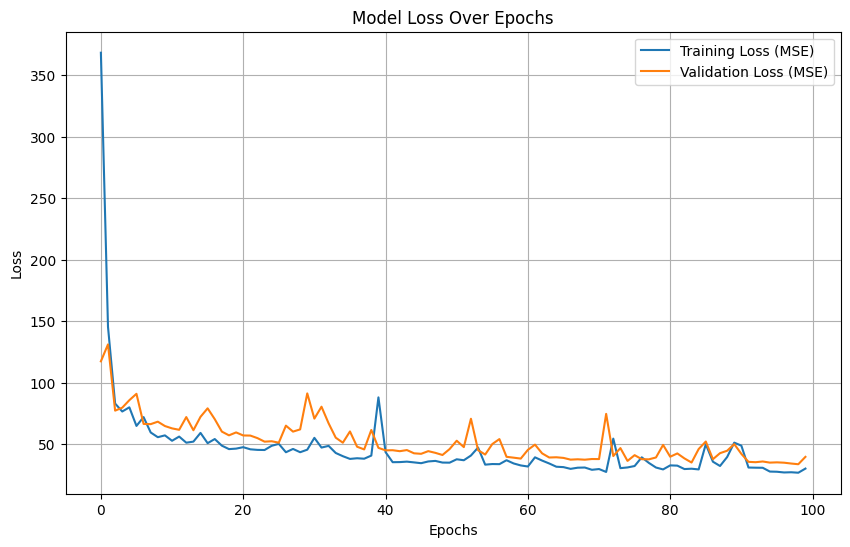

In [9]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
predictions = model.predict(test_data).flatten()

print("\nPredicted vs Actual Prices:")
for i in range(10):
    print(f"Predicted: ${predictions[i]:.2f}k, Actual: ${test_targets[i]:.2f}k")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Predicted vs Actual Prices:
Predicted: $11.79k, Actual: $7.20k
Predicted: $25.47k, Actual: $18.80k
Predicted: $26.35k, Actual: $19.00k
Predicted: $30.12k, Actual: $27.00k
Predicted: $28.01k, Actual: $22.20k
Predicted: $23.83k, Actual: $24.50k
Predicted: $32.62k, Actual: $31.20k
Predicted: $27.97k, Actual: $22.90k
Predicted: $22.33k, Actual: $20.50k
Predicted: $24.10k, Actual: $23.20k
